<a href="https://colab.research.google.com/github/NehaSontakk/BATH-Prokka-Comparison/blob/main/phmmer_E_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython

In [ ]:
from Bio import SeqIO

In [ ]:
import pandas as pd
import re
from Bio import SeqIO
df = pd.read_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/Alignment_Overlaps_Unique_Bedmap_COG_Matches.xlsx")
dna_fasta_file = "bin_82_prokka_annotation.fna"

In [ ]:
#Extract the information for each row of information
def extract_info(row):
    if pd.notnull(row['BATH']):
        bath_data = re.split(r'\t|\s+', str(row['BATH']))
        #print(bath_data)
        row['BATH_contig'] = bath_data[0]
        if len(bath_data) >= 3:
            row['BATH_annot'] = bath_data[-3]
            if int(bath_data[1]) < int(bath_data[2]):
              row['BATH_start'] = abs(int(bath_data[1]))
              row['BATH_end'] = abs(int(bath_data[2]))
            else:
              row['BATH_end'] = abs(int(bath_data[1]))
              row['BATH_start'] = abs(int(bath_data[2]))
        else:
            row['BATH_annot'] = None

    if pd.notnull(row['Prokka']):
        prokka_data = re.split(r'\t|\s+', str(row['Prokka']))
        prokka_annotr = re.split(r':', str(row['Prokka']))[-1]
        row['Prokka_contig'] = prokka_data[0]
        if len(prokka_data) >= 3:
            #print("Prokka starts:",int(prokka_data[1]))
            row['Prokka_annot'] = prokka_annotr
            if int(prokka_data[1]) < int(prokka_data[2]):
              row['Prokka_start'] = abs(int(prokka_data[1]))
              row['Prokka_end'] = abs(int(prokka_data[2]))
            else:
              row['Prokka_end'] = abs(int(prokka_data[1]) )
              row['Prokka_start'] = abs(int(prokka_data[2]))
        else:
            row['Prokka_annot'] = None
    return row

In [ ]:
df2 = df.apply(extract_info, axis=1)

## Get BATH E-values

In [ ]:
bath_protein = pd.read_excel("/content/bin82_BATH_deduplicated-2.xlsx")
unnamed_cols = [col for col in bath_protein.columns if col.startswith('Unnamed')]
bath_protein.drop(columns=unnamed_cols, inplace=True)

In [ ]:
df3 = pd.merge(df2,bath_protein[['target name','query name','E-value','shifts']],how="left",left_on=['BATH_contig','BATH_annot'],right_on=['target name','query name'])

In [ ]:
!sudo apt-get update
!sudo apt-get install hmmer

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [891 kB]
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,858 kB]
Get:13 http://archive.ubuntu.

In [ ]:
#Finding the Prokka protein
import os

file_paths = [
    "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/kingdom/Bacteria/sprot",
    "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/kingdom/Bacteria/IS",
    "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/kingdom/Bacteria/AMR",
    "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/kingdom/Archaea/sprot",
    "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/kingdom/Mitochondria/sprot",
    "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/kingdom/Viruses/sprot"
]
combined_file = "/content/drive/MyDrive/Lab Work/Parkinsons_Data/combined_sequences.fasta"

with open(combined_file, 'w') as combined_fasta:
    for file_path in file_paths:
        if os.path.exists(file_path):
            for record in SeqIO.parse(file_path, "fasta"):
                SeqIO.write(record, combined_fasta, "fasta")
        else:
            print(f"File not found: {file_path}")

def get_fasta_entries(fasta_path, protein_name):
    #print(protein_name)
    if pd.isna(protein_name):
          return None
    for record in SeqIO.parse(fasta_path, "fasta"):
        if protein_name == record.name:
          #print(record.seq)
          return str(record.seq)

def get_prokka_fasta_sequence(row):
    return get_fasta_entries(combined_file, row['Prokka_annot'])



In [ ]:
import numpy as np
df3['Prokka_annot'] = df3['Prokka_annot'].str.replace("002006", "", regex=False)
df3['Prokka_annot'].replace("", np.nan, inplace=True)

In [ ]:
df3['Prokka Uniprot Protein Sequence'] = df3.apply(get_prokka_fasta_sequence,axis=1)

In [ ]:
df3[~df3['Prokka_annot'].isna()]['Prokka Uniprot Protein Sequence']

0                                                   None
1      MTTFGHDTWWLVAAKAIAVFVFLMLTVLVAILAERKLLGRMQLRPG...
2                                                   None
3                                                   None
4      MAKLVATRYASAIFEVGVELNKEEMFYEELKIISSNFEENEKFFKM...
                             ...                        
407    MIEFVYPHTQLVAGVDEVGRGPLVGAVVTAAVILDPARPIAGLNDS...
408    MKQDSRFPNLFILDHPLIQHKLTHMRDKDTSTRTFRELLREITLLM...
409    MSKSTAEIRQAFLDFFHSKGHQVVASSSLVPHNDPTLLFTNAGMNQ...
410    MTDVDRVEPETPPEREETDAELTARFERDAIPLLDQLYGGALRMTR...
411    MSGIDAKKIRTRHFREAKVNGQKVSVLTSYDALSARIFDEAGVDML...
Name: Prokka Uniprot Protein Sequence, Length: 412, dtype: object

In [ ]:
def get_bath_fasta_sequence(row):
    return get_fasta_entries(combined_file, row['BATH_annot'])

In [ ]:
df3['BATH Uniprot Protein Sequence'] = df3.apply(get_bath_fasta_sequence,axis=1)

In [ ]:
import subprocess

def fetch_onlyhmm_path(protein_name, hmm_db_path):
    hmm_output_path = f"/content/output_{protein_name}.hmm"
    fetch_command = f"hmmfetch -o '{hmm_output_path}' '{hmm_db_path}' '{protein_name}'"
    result = os.system(fetch_command)
    if result != 0:
        print(f"Failed to fetch HMM for {protein_name} from {hmm_db_path}")
        return None
    if os.path.getsize(hmm_output_path) == 0:  # Check if the file is empty
        print(f"Warning: Generated HMM file {hmm_output_path} is empty.")
        return None
    return hmm_output_path



def run_phmmer_HAMAP_Uniprot(row,output_dir):
  out_path = None
  result = None
  if pd.isna(row['Prokka_annot']) or pd.isna(row['BATH_annot']):
        return np.nan, np.nan, np.nan
  print(row['Prokka_annot'],row['BATH_annot'])
  if row['Prokka_annot'].startswith('MF_') or row['BATH_annot'].startswith('MF_'):
      if row['Prokka_annot'].startswith('MF_'):
        print(row['BATH Uniprot Protein Sequence'])
        out_path = os.path.join(output_dir, f"{row['Prokka_annot']}_{row['BATH_annot']}_results.out")
        #Fetch the HAMAP hmm file for this
        prokka_hmm_output_path = fetch_onlyhmm_path(row['Prokka_annot'], hmm_db_path)
        print(prokka_hmm_output_path)
        #Make a second protein file for the bath sequence
        protein_sequence_path = os.path.join(output_dir, f"{row['BATH_annot']}_forphmmer.fa")
        with open(protein_sequence_path, 'w') as protein_file:
            protein_file.write(f">{row['BATH_annot']}\n{row['BATH Uniprot Protein Sequence']}\n")
        cmd = ['phmmer', '--tblout', out_path, protein_sequence_path, prokka_hmm_output_path]
        result = subprocess.run(cmd, capture_output=True, text=True)
        #os.remove(protein_sequence_path)
        #os.remove(prokka_hmm_output_path)

        if result.returncode != 0:
          return np.nan, np.nan, np.nan
        return result.stdout

      elif row['BATH_annot'].startswith('MF_'):
        #Fetch the HAMAP file for BATH
        bath_hmm_output_path = fetch_onlyhmm_path(row['BATH_annot'], hmm_db_path)
        out_path = os.path.join(output_dir, f"{row['Prokka_annot']}_{row['BATH_annot']}_results.out")
        protein_sequence_path = os.path.join(output_dir, f"{row['Prokka_annot']}_forphmmer.fa")
        with open(protein_sequence_path, 'w') as protein_file:
            protein_file.write(f">{row['Prokka_annot']}\n{row.get('Prokka Uniprot Protein Sequence', '')}\n")
        cmd = ['phmmer', '--tblout', out_path, protein_sequence_path, bath_hmm_output_path]
        result = subprocess.run(cmd, capture_output=True, text=True)
        #os.remove(protein_sequence_path)
        #os.remove(prokka_hmm_output_path)


  if row['Prokka_annot'].startswith('MF_') and row['BATH_annot'].startswith('MF_'):
      #print("Two MFs")
      out_path = os.path.join(output_dir, f"{row['Prokka_annot']}_{row['BATH_annot']}_results.out")
      bath_hmm_output_path = fetch_onlyhmm_path(row['BATH_annot'], hmm_db_path)
      prokka_hmm_output_path = fetch_onlyhmm_path(row['Prokka_annot'], hmm_db_path)
      cmd = ['phmmer', '--tblout', out_path, bath_hmm_output_path, prokka_hmm_output_path]
      result = subprocess.run(cmd, capture_output=True, text=True)
      os.remove(protein_sequence_path)

  if not row['Prokka_annot'].startswith('MF_') or not row['BATH_annot'].startswith('MF_'):
      out_path = os.path.join(output_dir, f"{row['Prokka_annot']}_{row['BATH_annot']}_results.out")
      prokka_protein_sequence_path = os.path.join(output_dir, f"{row['Prokka_annot']}_forphmmer.fa")
      with open(prokka_protein_sequence_path, 'w') as protein_file:
          protein_file.write(f">{row['Prokka_annot']}\n{row.get('Prokka Uniprot Protein Sequence', '')}\n")
      bath_protein_sequence_path = os.path.join(output_dir, f"{row['BATH_annot']}_forphmmer.fa")
      with open(bath_protein_sequence_path, 'w') as protein_file:
          protein_file.write(f">{row['BATH_annot']}\n{row.get('BATH Uniprot Protein Sequence', '')}\n")
      cmd = ['phmmer', '--tblout', out_path, bath_protein_sequence_path, prokka_protein_sequence_path]
      result = subprocess.run(cmd, capture_output=True, text=True)
      try:

        if os.path.exists(prokka_protein_sequence_path):
            os.remove(prokka_protein_sequence_path)
        if os.path.exists(bath_protein_sequence_path):
            os.remove(bath_protein_sequence_path)
      except Exception as e:
          print(f"Error removing files: {e}")

  e_value, i_evalue, c_evalue = "No match", "No match", "No match"
  found_match = False

  if result and result.returncode == 0:
      with open(out_path, 'r') as file:
          for line in file:
              if not line.startswith("#"):
                  found_match = True
                  parts = line.strip().split()
                  if len(parts) > 11:  # Verify the column count
                      e_value = parts[4]
                      #print(e_value)
                      i_evalue = parts[11]  # Typical i-Evalue column
                      c_evalue = parts[10]  # Typical c-Evalue column
                      os.remove(out_path)
                      break
  elif result:
      print(f"Error running phmmer: {result.stderr}")

  if not found_match:
      os.remove(out_path)
      return "No significant matches found", "No significant matches found", "No significant matches found"

  return e_value, i_evalue, c_evalue



output_dir = "/content/"
#df3.apply(lambda row: run_phmmer_HAMAP_Uniprot(row), axis=1)
hmm_db_path = "/content/drive/MyDrive/Lab Work/Parkinsons_Data/Prokka db/hmm/HAMAP.hmm"
df3['phmmer_eic_values'] = df3.apply(run_phmmer_HAMAP_Uniprot, axis=1, args=(output_dir,))

MF_00361 Q8ZH09
MNNRRFDCIGIVGHPRHPAALATHEILYHWLKARGYAVMVEQQIAHDLNLTDAITGSLADIGQKADLAVVVGGDGNMLGAARVLARYDIKVIGVNRGNLGFLTDLDPDNALQQLSDVLEGEYLSEQRFLLETHVRRTNQQSRISTAINEVVLHPGKVAHMIEFEVYIDDRFAFSQRSDGLIIATPTGSTAYSLSAGGPILTPTLDAIVLVPMFPHTLTARPLVISSSSTIRLKFSHITSDLEISCDSQIALPIQEGEEVLIRRSDFHLNLIHPKDYSYFNTLSTKLGWSKKLF
/content/output_MF_00361.hmm
P9WIX1 P9WIX1
MF_01897 Q5SIL4
MAQVLPVEITEELKQSFINYAMSVIVDRALPDVRDGLKPVQRRILFGAYQEGVLPGRKHVKSAKIVGEVMGKYHPHGDAAIYDALVRMAQPWNLRYPLIDGQGNFGSIDGDPPAAQRYTEARLSPIGAEMLLDIDKDTVDFRPNYDGSLKEPEVLPAAIPNLLVNGASGIAVGMATSLPPHNLSEVVDALVAMIENPAITLEEVMRHLPGPDFPTGGKLSKKGIKEAYATGRGSLKVRAKVRVEEKGQRPVLVVTEIPYQVNKASLIAQIAALVKAKKIEDIVGLRDESDRQGLRIAIELKRGANPQVVLNQLYKHTALQTSFTVNLLAIVDGEPKVLSLLDLMRHYLDHRKEVVRRRSLFELRKAEERAHVLEGLLIALDHIDEVIALIRGSEDAPKARIALMERFGLSEAQAQAILDMRLQRLVALEREKLLEEYRGLMEEIARLKAILEDEARLLAEVKADLLRVKEKYGDARRTLITEFEETFNPEDLIEDEPMVITLTAQGFLKRLPLESYRAQGRGGKGLLAGRTKEEDEATHVFVADAHDDLLLFTNRGRVYRLKVYELPEMGRQARGVHVKSLLPLAEDEEVAALLSVRGLDQEGYLVFATERGLVKRTALKEYQNLGQAGLI

In [ ]:
df3['phmmer_eic_values'].dropna()

0         (nan, nan, nan)
1      (4.6e-277, 1, 1.0)
2         (nan, nan, nan)
3         (nan, nan, nan)
4      (1.9e-112, 1, 1.0)
              ...        
407    (1.9e-134, 1, 1.0)
408     (1.3e-70, 1, 1.0)
409    (7.4e-261, 1, 1.0)
410    (2.5e-146, 1, 1.0)
411    (2.2e-175, 1, 1.0)
Name: phmmer_eic_values, Length: 412, dtype: object

In [ ]:
df3[['phmmeroutput_e_value', 'phmmeroutput_i_value', 'phmmeroutput_c_value']] = pd.DataFrame(df3['phmmer_eic_values'].tolist(), index=df3.index)

In [ ]:
df3[['phmmeroutput_e_value', 'phmmeroutput_i_value', 'phmmeroutput_c_value','Name_or_COG_Match']].dropna()

,phmmeroutput_e_value,phmmeroutput_i_value,phmmeroutput_c_value,Name_or_COG_Match
1,4.6e-277,1,1.0,Yes
4,1.9e-112,1,1.0,Yes
5,0,1,1.0,Yes
6,1.5e-62,1,1.0,No
7,1.1e-61,1,1.0,No
...,...,...,...,...
407,1.9e-134,1,1.0,Yes
408,1.3e-70,1,1.0,Yes
409,7.4e-261,1,1.0,Yes
410,2.5e-146,1,1.0,Yes


In [ ]:
df3.to_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/phmmer_Evalues_COG_Matches.xlsx")

In [ ]:
df3

,Unnamed: 0.1,Unnamed: 0,Prokka,BATH,label,Annotation_Match,Prokka COGs,BATH COGs,Name_or_COG_Match,BATH_contig,...,target name,query name,E-value,shifts,Prokka Uniprot Protein Sequence,BATH Uniprot Protein Sequence,phmmer_eic_values,phmmeroutput_e_value,phmmeroutput_i_value,phmmeroutput_c_value
0,0,515,k127_1013475\t131508\t132365\tCKDIDOFJ_00111\t...,k127_1013475\t131694\t132353\tQ8ZH09\t+\t0,BATH and Prokka Annotated,No,KOG2178,COG0061,No,k127_1013475,...,NaN,NaN,NaN,NaN,None,MNNRRFDCIGIVGHPRHPAALATHEILYHWLKARGYAVMVEQQIAH...,"(nan, nan, nan)",NaN,NaN,NaN
1,1,488,k127_1013475\t904\t2010\tCKDIDOFJ_00002\t+\tab...,k127_1013475\t982\t1986\tP9WIX1\t+\t0,BATH and Prokka Annotated,Yes,COG1005,COG1005,Yes,k127_1013475,...,NaN,NaN,NaN,NaN,MTTFGHDTWWLVAAKAIAVFVFLMLTVLVAILAERKLLGRMQLRPG...,MTTFGHDTWWLVAAKAIAVFVFLMLTVLVAILAERKLLGRMQLRPG...,"(4.6e-277, 1, 1.0)",4.6e-277,1,1.0
2,2,550,k127_2074107\t189226\t192078\tCKDIDOFJ_00670\t...,k127_2074107\t189490\t190485\tQ5SIL4\t+\t0,BATH and Prokka Annotated,No,KOG0355,COG0188,No,k127_2074107,...,NaN,NaN,NaN,NaN,None,MAQVLPVEITEELKQSFINYAMSVIVDRALPDVRDGLKPVQRRILF...,"(nan, nan, nan)",NaN,NaN,NaN
3,3,490,k127_1013475\t3944\t5182\tCKDIDOFJ_00005\t+\ta...,k127_1013475\t4448\t5059\tO05330\t+\t0,BATH and Prokka Annotated,No,COG0356,NaN,No,k127_1013475,...,NaN,NaN,NaN,NaN,None,MFDGEAIRWFEFFVPTNSTLWMAIGVLMIALLMVVGTLRRAIVPGR...,"(nan, nan, nan)",NaN,NaN,NaN
4,4,491,k127_1013475\t6301\t6852\tCKDIDOFJ_00008\t+\ta...,k127_1013475\t6313\t6843\tQ0ZS22\t+\t0,BATH and Prokka Annotated,Yes,NaN,NaN,Yes,k127_1013475,...,NaN,NaN,NaN,NaN,MAKLVATRYASAIFEVGVELNKEEMFYEELKIISSNFEENEKFFKM...,MAKLVATRYASAIFEVGVELNKEEMFYEELKIISSNFEENEKFFKM...,"(1.9e-112, 1, 1.0)",1.9e-112,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,389,942,k127_2417308\t29160\t29771\tCKDIDOFJ_00167\t+\...,k127_2417308\t29202\t29744\tP10442\t+\t0,BATH and Prokka Annotated,Yes,COG0164,COG0164,Yes,k127_2417308,...,NaN,NaN,NaN,NaN,MIEFVYPHTQLVAGVDEVGRGPLVGAVVTAAVILDPARPIAGLNDS...,MIEFVYPHTQLVAGVDEVGRGPLVGAVVTAAVILDPARPIAGLNDS...,"(1.9e-134, 1, 1.0)",1.9e-134,1,1.0
408,390,943,k127_2417308\t37675\t38328\tCKDIDOFJ_00176\t+\...,k127_2417308\t37705\t38322\tQ72J35\t+\t0,BATH and Prokka Annotated,No,COG0035,COG0035,Yes,k127_2417308,...,NaN,NaN,NaN,NaN,MKQDSRFPNLFILDHPLIQHKLTHMRDKDTSTRTFRELLREITLLM...,MRITLVDHPLVQHKLAHLRDKRTGPKDFRELAEEVAMLMAYEAMRD...,"(1.3e-70, 1, 1.0)",1.3e-70,1,1.0
409,391,704,k127_922904\t15886\t18519\tCKDIDOFJ_01229\t+\t...,k127_922904\t15889\t18504\tO67323\t+\t0,BATH and Prokka Annotated,No,COG0013,COG0013,Yes,k127_922904,...,NaN,NaN,NaN,NaN,MSKSTAEIRQAFLDFFHSKGHQVVASSSLVPHNDPTLLFTNAGMNQ...,MSLSAHEIRELFLSFFEKKGHTRVKSAPLVPENDPTLLFVNAGMVP...,"(7.4e-261, 1, 1.0)",7.4e-261,1,1.0
410,392,945,k127_2417308\t42148\t42651\tCKDIDOFJ_00182\t+\...,k127_2417308\t42154\t42633\tA0QTP2\t+\t0,BATH and Prokka Annotated,Yes,COG1595,COG1595,Yes,k127_2417308,...,k127_2417308,A0QTP2,1.300000e-12,0.0,MTDVDRVEPETPPEREETDAELTARFERDAIPLLDQLYGGALRMTR...,MTDVDRVEPETPPEREETDAELTARFERDAIPLLDQLYGGALRMTR...,"(2.5e-146, 1, 1.0)",2.5e-146,1,1.0


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


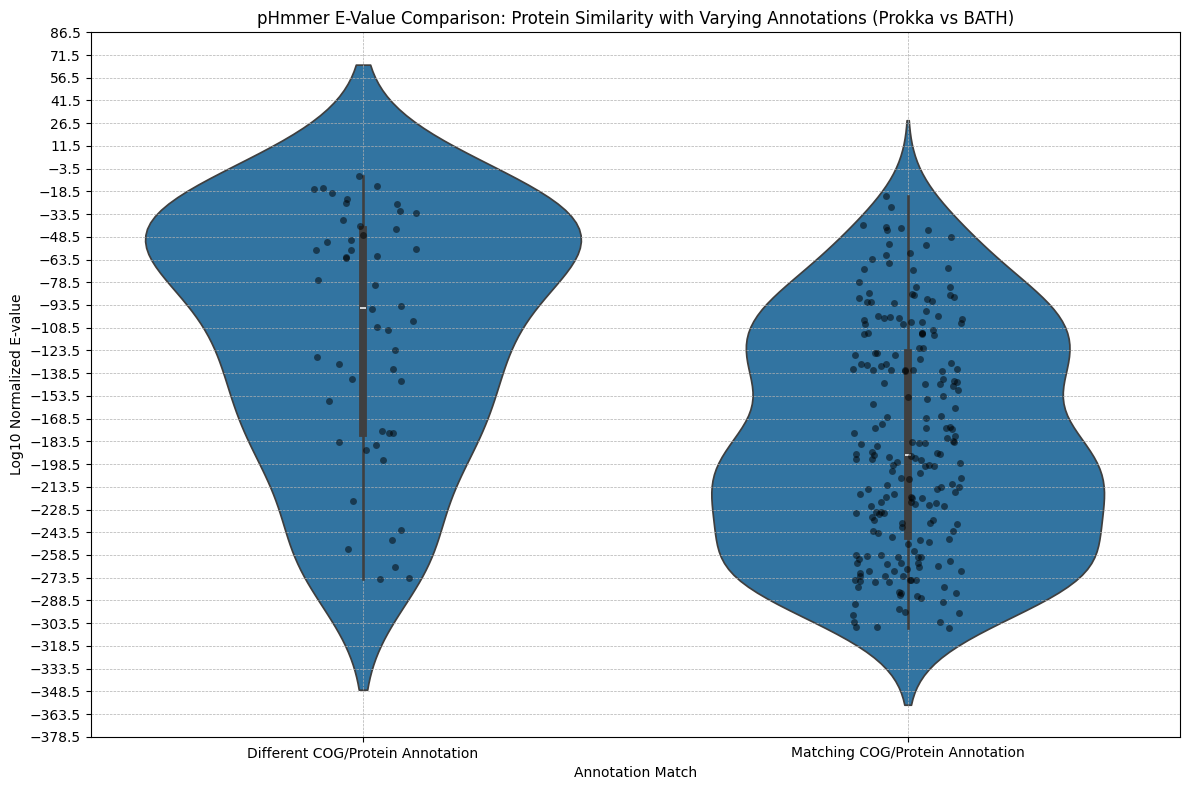

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out non-numeric values
numeric_values = pd.to_numeric(df3['phmmeroutput_e_value'], errors='coerce')

# Apply log normalization only to numeric values
df3['Log_phmmeroutput_e_value'] = np.log10(numeric_values)

# Melt the DataFrame for plotting, assuming you have 'Name_or_COG_Match' as your categorical column
melted_df = pd.melt(df3, id_vars='Name_or_COG_Match', value_vars=['Log_phmmeroutput_e_value'],
                    var_name='Variable', value_name='Log_Evalue')

# Plotting the violin plot along with strip plot for detailed data view
plt.figure(figsize=(12, 8))
sns.violinplot(x='Name_or_COG_Match', y='Log_Evalue', data=melted_df)
sns.stripplot(x='Name_or_COG_Match', y='Log_Evalue', data=melted_df, color='k', alpha=0.5, jitter=True)

# Set title and labels
plt.title('pHmmer E-Value Comparison: Protein Similarity with Varying Annotations (Prokka vs BATH)')
plt.xlabel('Annotation Match')
plt.ylabel('Log10 Normalized E-value')
plt.xticks([0, 1], ['Different COG/Protein Annotation', 'Matching COG/Protein Annotation'])

# Set y-ticks
ylim = plt.gca().get_ylim()
plt.yticks(np.arange(start=ylim[0], stop=ylim[1] + 15, step=15))

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
